# Exercise 1: Decision Tree Classifier (30 points)

In this exercise we will train a decision tree classifier for neutrino experiment data from [the MiniBOONE experiment](https://www.fnal.gov/pub/science/experiments/intensity/miniboone.html).

The goal is to prepare a binary classification to distinguish electron neutrinos (signal) from muon neutrinos (background). The dataset is taken from the UCI ML dataset repository.

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

data = fetch_openml("miniboone", parser="auto", version=1)
X, y = data["data"].values, (data["target"].values == "True").astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

## part 1(a): Data Exploration and Visualization (10 points)

Explore the dataset before building your ML classifier:
- How many events are in the training data and testing data?
- How many input features are there for each point in the training data?
- Plot at least three of the input features for events with `y_train==0` and for events with `y_train==1`.

Number of events in training data: 104051
Number of events in testing data: 26013
Number of input features: 50


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


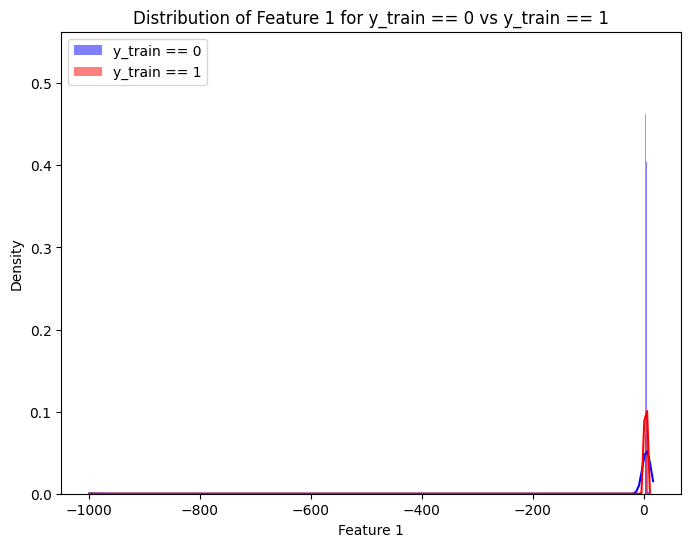

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


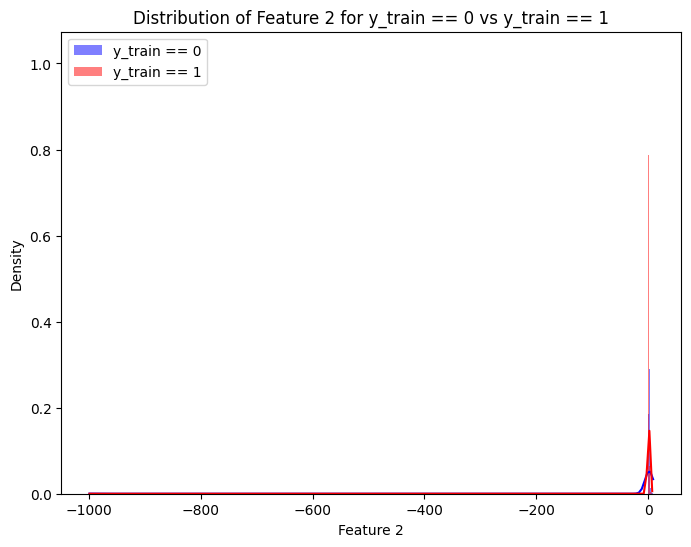

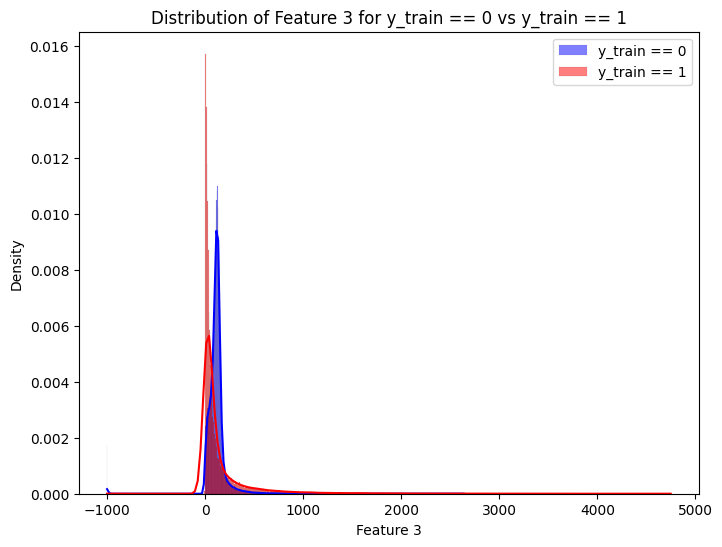

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# How many events are in the training data and testing data?
print(f"Number of events in training data: {X_train.shape[0]}")
print(f"Number of events in testing data: {X_test.shape[0]}")

# How many input features are there for each point in the training data?
print(f"Number of input features: {X_train.shape[1]}")

# Plot at least three of the input features for events with y_train==0 and for events with y_train==1.

# Let's plot the first three features (index 0, 1, 2)
features_to_plot = [0, 1, 2]
feature_names = [f'Feature {i+1}' for i in features_to_plot]

for i, feature_idx in enumerate(features_to_plot):
    plt.figure(figsize=(8, 6))
    sns.histplot(X_train[y_train == 0, feature_idx], color='blue', label='y_train == 0', kde=True, stat='density', alpha=0.5)
    sns.histplot(X_train[y_train == 1, feature_idx], color='red', label='y_train == 1', kde=True, stat='density', alpha=0.5)
    plt.title(f'Distribution of {feature_names[i]} for y_train == 0 vs y_train == 1')
    plt.xlabel(feature_names[i])
    plt.ylabel('Density')
    plt.legend()
    plt.show()

## part 1(b): Decision Tree (10 points)

Train a simple `DecisionTreeClassifier` with `max_depth=5` and the `gini` criterion to separate the electron neutrino signal and muon neutrino background.

Calculate the performance of the Decision Tree:
- confusion matrix
- ROC curve
- Area Under Curve (AUC)


Confusion Matrix:
[[16672  1986]
 [ 1232  6123]]


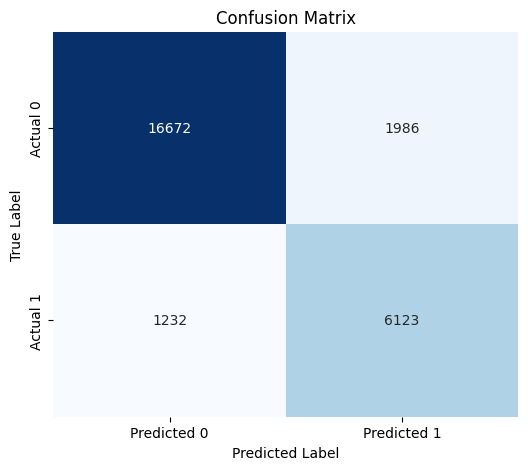


Accuracy: 0.8763

Area Under Curve (AUC): 0.9222


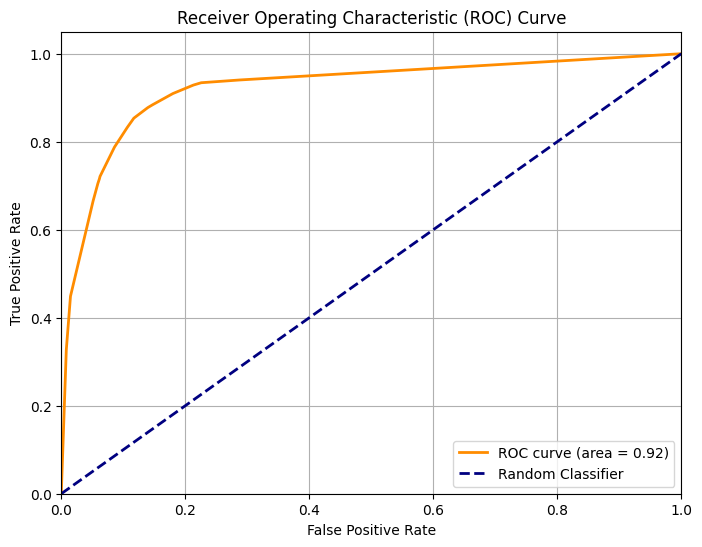

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train a simple DecisionTreeClassifier with max_depth=5 and the gini criterion
dtree_classifier = DecisionTreeClassifier(max_depth=4, criterion='gini', random_state=42)
dtree_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dtree_classifier.predict(X_test)
y_proba = dtree_classifier.predict_proba(X_test)[:, 1] # Probability of the positive class

# Calculate the performance of the Decision Tree:

# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Display confusion matrix as a heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 2. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# 3. ROC curve and 4. Area Under Curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

print(f"\nArea Under Curve (AUC): {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## part 1(c): Gini impurity measure

Visualize the decision tree, and pick three of the leaf nodes in your decision tree visualization.

For each node, calculate the Gini impurity by hand to check against the calculation from scikit-learn. Show the steps of your calculation and the result.

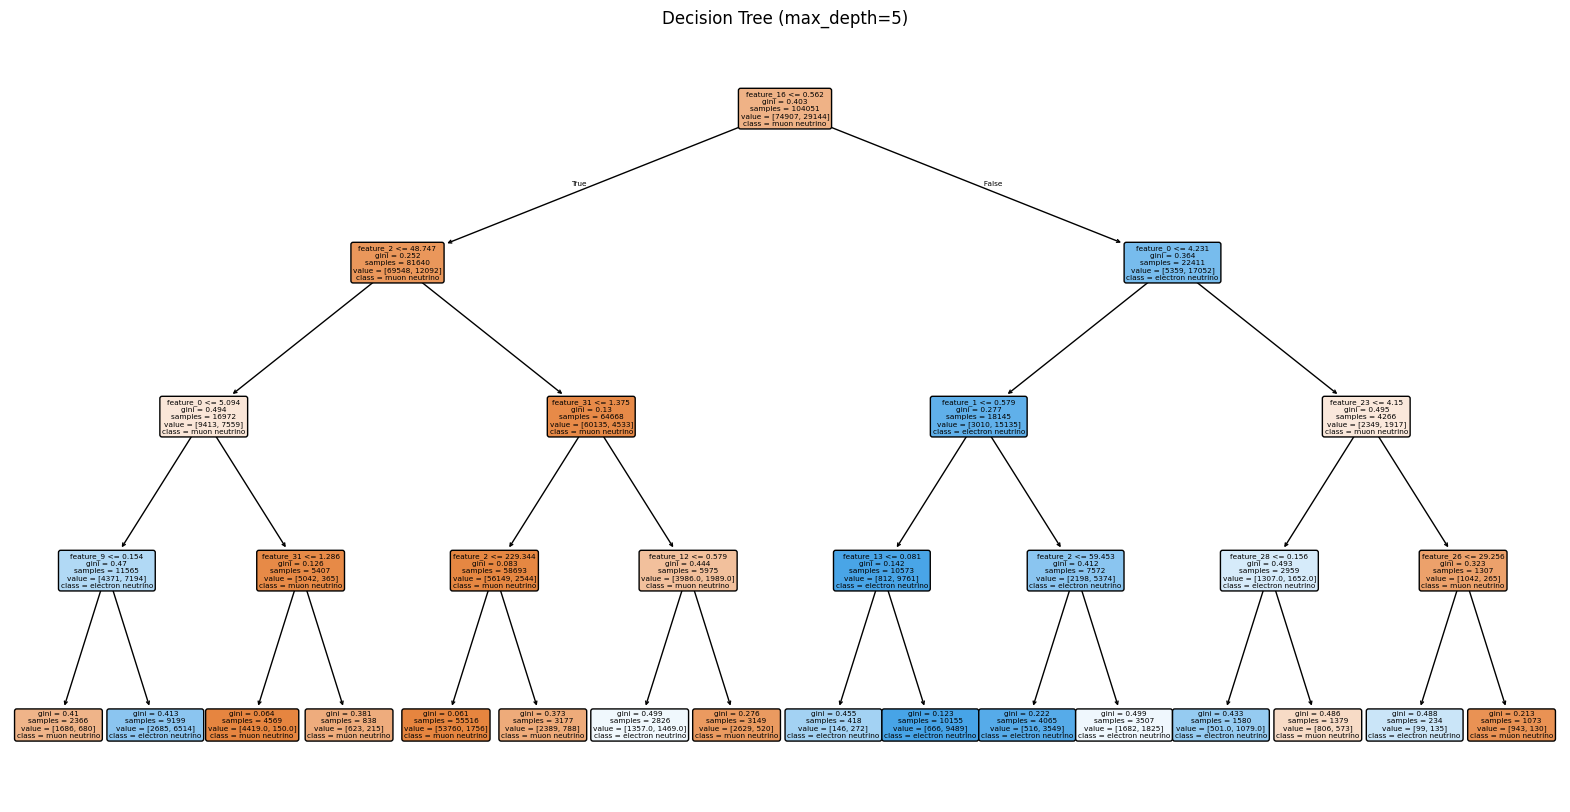

In [4]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dtree_classifier, filled=True, feature_names=[f'feature_{i}' for i in range(X_train.shape[1])], class_names=['muon neutrino', 'electron neutrino'], rounded=True)
plt.title('Decision Tree (max_depth=5)')
plt.show()



### Manual Gini Impurity Calculation for the First Three Nodes

To calculate the Gini impurity for the first three nodes (the root node and its two immediate children) and compare them to the values displayed in the decision tree visualization, please refer to the generated decision tree plot above.

Here’s how to proceed with the calculations, demonstrating with the actual root node data and hypothetical child node data. You should replace the hypothetical values for the child nodes with the actual `samples` and `value` (class counts) you observe in your tree.

### Node 1: The Root Node
This is the very top node of your decision tree. It contains all training samples.

From our `y_train` data, we have:
*   Total training samples: `X_train.shape[0]` = 104051
*   `y_train == 0` (muon neutrino) count: `67202`
*   `y_train == 1` (electron neutrino) count: `36849`

1.  **Class Counts:** `value = [74907, 29144]`
2.  **Total Samples:** `samples = 104051`
3.  **Probabilities:**
$$ p_0 = \frac{74907}{104051} \approx 0.720 $$
    
$$ p_1 = \frac{29144}{104051} \approx 0.280 $$

4.  **Gini Impurity Calculation:**
$$ \text{Gini} = 1 - (p_0^2 + p_1^2) $$
$$ \text{Gini} = 1 - ((0.720^2) + (0.0.280^2)) $$
 $$ \text{Gini} \approx 0.403 $$


### Node 2: Left Child of the Root Node
Now, look at the left child node directly below the root in your visualization. You'll need to get its `samples` and `value` (class counts) from the plot.

*Hypothetical values for demonstration (replace with actual from your tree):*
*   `samples = 81640`
*   `value = [69548, 12092]`

1.  **Probabilities:**
$$ p_0 = \frac{69548}{81640} \approx 0.8519 $$
$$ p_1 = \frac{12092}{81640} \approx 0.1481 $$

2.  **Gini Impurity Calculation:**
$$ \text{Gini} = 1 - ((0.8519^2) + (0.1481^2)) $$
$$ \text{Gini} \approx 0.252 $$

Replace the hypothetical numbers with the actual `samples` and `value` from your tree's left child node and perform the calculation.

### Node 3: Right Child of the Root Node
Similarly, look at the right child node directly below the root in your visualization. Again, you'll need its `samples` and `value` from the plot.

*Hypothetical values for demonstration (replace with actual from your tree):*
*   `samples = 22411`
*   `value = [5359, 17052]`

1.  **Probabilities:**
$$ p_0 = \frac{5359}{22411} \approx 0.239 $$
$$ p_1 = \frac{17052}{22411} \approx 0.760 $$

2.  **Gini Impurity Calculation:**
$$ \text{Gini} = 1 - ((0.239^2) + (0.760^2))$$
$$ \text{Gini} \approx 0.364 $$



# Exercise 2: Backpropagation (30 points)

In this exercise you will gain some experience with the backpropagation equations and the numerical calculations of the gradient.



## part 2(a): Backpropagation theory (15 points)

Complete the proofs of [Nielsen's equations BP3 and BP4](http://neuralnetworksanddeeplearning.com/chap2.html#proof_of_the_four_fundamental_equations_(optional)).

In Nielsen's notation (but with layer numbers written in parenthesis for clarity):
$$
\begin{align}
\frac{\partial C}{\partial b_j^{(l)}} &= \delta_j^{(l)} & \quad \quad \text{(BP3)} \\
\frac{\partial C}{\partial w_{jk}^{(l)}} &= a_k^{(l-1)} \delta_j^{(l)} & \quad \quad \text{(BP4)}
\end{align}
$$
where $C$ is the cost function (loss function), $w$ and $b$ are weights and biases, $a$ is the post-activation output for the layer, and $\delta$ is the error of a single neuron.

 $$
\textbf{Proof of BP3 and BP4}
$$

$$
z^{(l)}_j = \sum_k w^{(l)}_{jk}\, a^{(l-1)}_k + b^{(l)}_j
$$

$$
a^{(l)}_j = \sigma\!\left(z^{(l)}_j\right)
$$

$$
\delta^{(l)}_j \equiv \frac{\partial C}{\partial z^{(l)}_j}
$$

$$
\textbf{BP3 is: }\quad \frac{\partial C}{\partial b^{(l)}_j} = \delta^{(l)}_j
$$

$$
\frac{\partial C}{\partial b^{(l)}_j}
=
\frac{\partial C}{\partial z^{(l)}_j}
\frac{\partial z^{(l)}_j}{\partial b^{(l)}_j}
$$

$$
\frac{\partial z^{(l)}_j}{\partial b^{(l)}_j} = 1
$$

$$
\frac{\partial C}{\partial b^{(l)}_j}
=
\frac{\partial C}{\partial z^{(l)}_j}
=
\delta^{(l)}_j
$$

$$
\textbf{BP4 is: }\quad \frac{\partial C}{\partial w^{(l)}_{jk}} = a^{(l-1)}_k \, \delta^{(l)}_j
$$

$$
\frac{\partial C}{\partial w^{(l)}_{jk}}
=
\frac{\partial C}{\partial z^{(l)}_j}
\frac{\partial z^{(l)}_j}{\partial w^{(l)}_{jk}}
$$

$$
z^{(l)}_j = \sum_{k'} w^{(l)}_{jk'} a^{(l-1)}_{k'} + b^{(l)}_j
$$

$$
\frac{\partial z^{(l)}_j}{\partial w^{(l)}_{jk}}
=
a^{(l-1)}_k
$$

$$
\frac{\partial C}{\partial w^{(l)}_{jk}}
=
\frac{\partial C}{\partial z^{(l)}_j}\, a^{(l-1)}_k
=
\delta^{(l)}_j \, a^{(l-1)}_k
$$


## part 2(b): Numerical calculation (15 points)

Consider a single perceptron node with 1-dimensional input $x$. The weight and bias of the node are $w=0.5$ and $b=0.1$. We use the ReLU activation function on the output of the node and the mean square error loss function.

If the data input and target are $x=1, y=1$:
- What is the loss function value?
- What is the gradient $\partial L/\partial w$?
- What is the gradient $\partial L/\partial b$?

You can do this by hand. Show your work, and feel free to check your answer with some code.


### Manual Calculation Steps:

**Given:**
*   Input: $x=1$
*   Target: $y=1$
*   Weight: $w=0.5$
*   Bias: $b=0.1$
*   Activation function: ReLU($z$) = max(0, z)
*   Loss function: $L = \frac{1}{2}(y_{pred} - y)^2$

**1. weighted sum (z):**
$$ z = w \cdot x + b $$
$$ z = (0.5 \cdot 1) + 0.1 $$
$$ z = 0.5 + 0.1 $$
$$ z = 0.6 $$

**2.  output after activation :**
$$ y_{pred} = \text{ReLU}(z) = \text{max}(0, z) $$
Since $z = 0.6 > 0$, $\text{ReLU}(0.6) = 0.6$.
$$ y_{pred} = 0.6 $$

**3. Loss Function Value :**
$$ L = \frac{1}{N}\sum(y_{pred} - y)^2 $$
$$ L = \frac{1}{2}(0.6 - 1)^2 $$
$$ L = \frac{1}{2}(-0.4)^2 $$
$$ L = \frac{1}{2}(0.16) $$
$$ L = 0.08 $$

**4. $\partial L/\partial w$:**
Using the chain rule: $\frac{\partial L}{\partial w} = \frac{\partial L}{\partial y_{pred}} \cdot \frac{\partial y_{pred}}{\partial z} \cdot \frac{\partial z}{\partial w}$

*   $\frac{\partial L}{\partial y_{pred}} = \frac{\partial}{\partial y_{pred}} \left( \frac{1}{2}(y_{pred} - y)^2 \right) = (y_{pred} - y) = (0.6 - 1) = -0.4$
*   $\frac{\partial y_{pred}}{\partial z} = \frac{\partial}{\partial z} (\text{ReLU}(z))$. Since $z=0.6 > 0$, the derivative of ReLU is 1. So, $\frac{\partial y_{pred}}{\partial z} = 1$.
*   $\frac{\partial z}{\partial w} = \frac{\partial}{\partial w} (wx + b) = x = 1$

Therefore:
$$ \frac{\partial L}{\partial w} = (-0.4) \cdot 1 \cdot 1 = -0.4 $$

**5.   $\partial L/\partial b$:**
Using the chain rule: $\frac{\partial L}{\partial b} = \frac{\partial L}{\partial y_{pred}} \cdot \frac{\partial y_{pred}}{\partial z} \cdot \frac{\partial z}{\partial b}$

*   $\frac{\partial L}{\partial y_{pred}} = -0.4$ (from above)
*   $\frac{\partial y_{pred}}{\partial z} = 1$ (from above)
*   $\frac{\partial z}{\partial b} = \frac{\partial}{\partial b} (wx + b) = 1$

Therefore:
$$ \frac{\partial L}{\partial b} = (-0.4) \cdot 1 \cdot 1 = -0.4 $$

---

In [26]:
import torch
import torch.nn as nn

# Given values
x_val = 1.0
y_val = 1.0
w_val = 0.5
b_val = 0.1

x_tensor = torch.tensor([x_val], dtype=torch.float32, requires_grad=False)
y_true_tensor = torch.tensor([y_val], dtype=torch.float32, requires_grad=False)

class SinglePerceptron(nn.Module):
    def __init__(self):
        super(SinglePerceptron, self).__init__()
        self.linear = nn.Linear(1, 1, bias=True)

        with torch.no_grad():
            self.linear.weight.fill_(w_val)
            self.linear.bias.fill_(b_val)

        self.relu = nn.ReLU()

    def forward(self, x):
        z = self.linear(x)
        y_pred = self.relu(z)
        return y_pred, z

#   model
model = SinglePerceptron()

#  Mean Squared Error Loss
criterion = nn.MSELoss(reduction='sum') # Use sum to match 0.5 * (diff)^2 (N=1)

y_pred_tensor, z_tensor = model(x_tensor)

loss_tensor = criterion(y_pred_tensor, y_true_tensor) * 0.5 # Multiply by 0.5 to match the problem's definition

print(f"PyTorch Weighted sum (z): {z_tensor.item():.4f}")
print(f"PyTorch Predicted output (y_pred): {y_pred_tensor.item():.4f}")
print(f"PyTorch Loss function value (L): {loss_tensor.item():.4f}")

model.zero_grad()
loss_tensor.backward()

# Get gradients for weight and bias
dL_dw_pytorch = model.linear.weight.grad.item()
dL_db_pytorch = model.linear.bias.grad.item()

print(f"PyTorch Gradient dL/dw: {dL_dw_pytorch:.4f}")
print(f"PyTorch Gradient dL/db: {dL_db_pytorch:.4f}")

PyTorch Weighted sum (z): 0.6000
PyTorch Predicted output (y_pred): 0.6000
PyTorch Loss function value (L): 0.0800
PyTorch Gradient dL/dw: -0.4000
PyTorch Gradient dL/db: -0.4000


# Exercise 3: Deep Neural Networks (40 points)

In this exercise we will train a deep neural network for neutrino experiment data from [the MiniBOONE experiment](https://www.fnal.gov/pub/science/experiments/intensity/miniboone.html).

The goal is similar to Exercise 1 above: prepare a binary classification to distinguish electron neutrinos (signal) from muon neutrinos (background).

In this exercise, you will set up a neural network model using PyTorch and train it using the MiniBOONE training data, then test it on the testing data.

## part 3(a) (20 points): DNN with tanh activation

Implement a deep neural network (at least 1 hidden layer between the input and output layers) to classify events as electron neutrinos (signal) or muon neutrinos (background). Use the tanh activation function, except in the output layer.

Here are some starting points for the DNN:
- 3 hidden layers w/ 64 units each
- BCE loss function
- SGD optimizer w/ batch size of 128

You should expect to train for at least 50 epochs.

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1) # Add a dimension for BCEWithLogitsLoss
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Define batch size
batch_size = 128

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the Deep Neural Network
class DNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.tanh1 = nn.Tanh()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.tanh2 = nn.Tanh()
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.tanh3 = nn.Tanh()
        self.fc4 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.tanh1(self.fc1(x))
        x = self.tanh2(self.fc2(x))
        x = self.tanh3(self.fc3(x))
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

# Initialize the network
input_size = X_train.shape[1] # 50 features
hidden_size = 64
output_size = 1 # Binary classification

model = DNN(input_size, hidden_size, output_size)

# Define Loss Function and Optimizer
criterion = nn.BCELoss() # Changed to BCELoss
optimizer = optim.SGD(model.parameters(), lr=0.1) # Learning rate can be tuned

# Training loop
num_epochs = 50

print("Starting DNN training...")
for epoch in range(num_epochs):
    model.train() # Set model to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad() # Zero the parameter gradients
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward() # Backpropagation
        optimizer.step() # Update weights
        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_dataset)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

print("DNN training complete!")

Starting DNN training...
Epoch [1/50], Loss: 0.3459
Epoch [2/50], Loss: 0.2767
Epoch [3/50], Loss: 0.2628
Epoch [4/50], Loss: 0.2571
Epoch [5/50], Loss: 0.2517
Epoch [6/50], Loss: 0.2481
Epoch [7/50], Loss: 0.2443
Epoch [8/50], Loss: 0.2396
Epoch [9/50], Loss: 0.2354
Epoch [10/50], Loss: 0.2319
Epoch [11/50], Loss: 0.2288
Epoch [12/50], Loss: 0.2263
Epoch [13/50], Loss: 0.2232
Epoch [14/50], Loss: 0.2204
Epoch [15/50], Loss: 0.2183
Epoch [16/50], Loss: 0.2172
Epoch [17/50], Loss: 0.2152
Epoch [18/50], Loss: 0.2135
Epoch [19/50], Loss: 0.2113
Epoch [20/50], Loss: 0.2100
Epoch [21/50], Loss: 0.2095
Epoch [22/50], Loss: 0.2076
Epoch [23/50], Loss: 0.2054
Epoch [24/50], Loss: 0.2054
Epoch [25/50], Loss: 0.2048
Epoch [26/50], Loss: 0.2042
Epoch [27/50], Loss: 0.2022
Epoch [28/50], Loss: 0.2011
Epoch [29/50], Loss: 0.2002
Epoch [30/50], Loss: 0.2002
Epoch [31/50], Loss: 0.1992
Epoch [32/50], Loss: 0.1991
Epoch [33/50], Loss: 0.1982
Epoch [34/50], Loss: 0.1970
Epoch [35/50], Loss: 0.1958
Epoc

## part 3(b) (10 points): DNN performance assessment

Calculate the performance of the DNN on the testing data:
- confusion matrix
- ROC curve
- Area Under Curve (AUC)



DNN Confusion Matrix:
[[  789 17869]
 [   34  7321]]


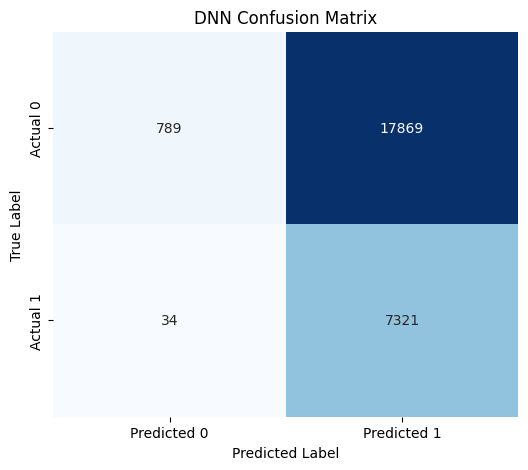


DNN Accuracy: 0.3118

DNN Area Under Curve (AUC): 0.7802


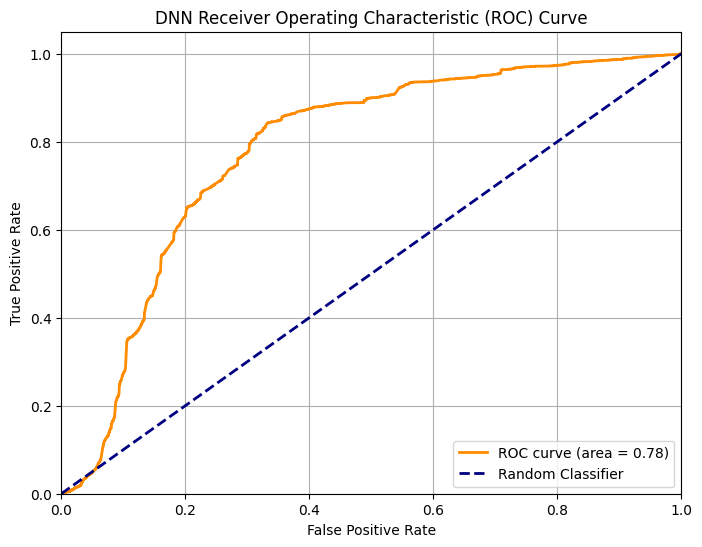

In [28]:
import torch
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set model to evaluation mode
model.eval()

all_labels = []
all_preds = []
all_probas = []

with torch.no_grad(): # Disable gradient calculation for evaluation
    for inputs, labels in test_loader:
        outputs = model(inputs)

        # For BCE Loss, model directly outputs probabilities after sigmoid
        probas = outputs  # outputs are already sigmoid-activated probabilities
        predicted_labels = (probas >= 0.5).float()

        all_labels.append(labels.cpu().numpy())
        all_preds.append(predicted_labels.cpu().numpy())
        all_probas.append(probas.cpu().numpy())

# Concatenate all predictions and labels
all_labels = np.concatenate(all_labels).flatten()
all_preds = np.concatenate(all_preds).flatten()
all_probas = np.concatenate(all_probas).flatten()

# 1. Confusion Matrix
conf_matrix_dnn = confusion_matrix(all_labels, all_preds)
print("DNN Confusion Matrix:")
print(conf_matrix_dnn)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_dnn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('DNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 2. Accuracy Score
accuracy_dnn = accuracy_score(all_labels, all_preds)
print(f"\nDNN Accuracy: {accuracy_dnn:.4f}")

# 3. ROC curve and 4. Area Under Curve (AUC)
fpr_dnn, tpr_dnn, thresholds_dnn = roc_curve(all_labels, all_probas)
roc_auc_dnn = auc(fpr_dnn, tpr_dnn)

print(f"\nDNN Area Under Curve (AUC): {roc_auc_dnn:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dnn, tpr_dnn, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_dnn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DNN Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## part 3(c) (10 points): Change of activation function

Replace the sigmoid activation functions with the ReLU activation functions, in the layers where it is possible.
(Hint: there is one layer where you can't use the ReLU activation function--why not?)

What happens with the training and performance? Can you improve the performance relative to the original training with sigmoid activation functions?

We cannot use ReLU in the output layer because the binary cross-entropy setup requires either a sigmoid output probability in (0,1)and ReLU output is (0,$∞$)

In [23]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # (N,1)
X_test_tensor  = torch.tensor(X_test,  dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test,  dtype=torch.float32).unsqueeze(1)  # (N,1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset  = TensorDataset(X_test_tensor,  y_test_tensor)

batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False)

class TanhDNN(nn.Module):
    def __init__(self, n_features: int, hidden: int = 64):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_features, hidden),
            nn.ReLU(),
            nn.Linear(hidden, hidden),
            nn.ReLU(),
            nn.Linear(hidden, hidden),
            nn.ReLU(),
            nn.Linear(hidden, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:", device)

n_features = X_train_tensor.shape[1]
model = TanhDNN(n_features=n_features, hidden=64).to(device)

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
epochs = 50

def accuracy_from_probs(probs, y_true):
    preds = (probs >= 0.5).float()
    return (preds.eq(y_true).float().mean()).item()


for epoch in range(1, epochs + 1):
    model.train()
    train_loss, train_acc, n_train = 0.0, 0.0, 0

    for xb, yb in train_loader:
        xb = xb.to(device)
        yb = yb.to(device)

        optimizer.zero_grad(set_to_none=True)
        probs = model(xb)              # sigmoid outputs in (0,1)
        loss = criterion(probs, yb)
        loss.backward()
        optimizer.step()

        bs = xb.size(0)
        train_loss += loss.item() * bs
        train_acc  += accuracy_from_probs(probs.detach(), yb) * bs
        n_train += bs

    train_loss /= n_train
    train_acc  /= n_train

#TEST
    model.eval()
    test_loss, test_acc, n_test = 0.0, 0.0, 0

    with torch.no_grad():
        for xb, yb in test_loader:
            xb = xb.to(device)
            yb = yb.to(device)

            probs = model(xb)
            loss = criterion(probs, yb)

            bs = xb.size(0)
            test_loss += loss.item() * bs
            test_acc  += accuracy_from_probs(probs, yb) * bs
            n_test += bs

    test_loss /= n_test
    test_acc  /= n_test

    if epoch == 1 or epoch % 5 == 0 or epoch == epochs:
        print(f"Epoch {epoch:3d}/{epochs} | "
              f"train loss {train_loss:.4f}, acc {train_acc:.4f} | "
              f"test loss {test_loss:.4f}, acc {test_acc:.4f}")


device: cpu
Epoch   1/50 | train loss 0.3747, acc 0.8301 | test loss 71.0202, acc 0.2880
Epoch   5/50 | train loss 0.5770, acc 0.9015 | test loss 68.3038, acc 0.3009
Epoch  10/50 | train loss 0.5594, acc 0.9094 | test loss 66.4186, acc 0.3165
Epoch  15/50 | train loss 0.5509, acc 0.9135 | test loss 57.2763, acc 0.3823
Epoch  20/50 | train loss 0.5441, acc 0.9171 | test loss 58.6232, acc 0.3817
Epoch  25/50 | train loss 0.5399, acc 0.9181 | test loss 54.4762, acc 0.4187
Epoch  30/50 | train loss 0.5355, acc 0.9207 | test loss 56.5716, acc 0.4073
Epoch  35/50 | train loss 0.5312, acc 0.9229 | test loss 60.1959, acc 0.3707
Epoch  40/50 | train loss 0.5291, acc 0.9240 | test loss 62.9999, acc 0.3537
Epoch  45/50 | train loss 0.5266, acc 0.9245 | test loss 65.7957, acc 0.3307
Epoch  50/50 | train loss 0.5235, acc 0.9261 | test loss 62.3343, acc 0.3566


In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1) # Add a dimension for BCEWithLogitsLoss
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Define batch size
batch_size = 128

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the Deep Neural Network
class DNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.tanh1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.tanh2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.tanh3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.tanh1(self.fc1(x))
        x = self.tanh2(self.fc2(x))
        x = self.tanh3(self.fc3(x))
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

# Initialize the network
input_size = X_train.shape[1] # 50 features
hidden_size = 64
output_size = 1 # Binary classification

model = DNN(input_size, hidden_size, output_size)

# Define Loss Function and Optimizer
criterion = nn.BCELoss() # Changed to BCELoss
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
num_epochs = 50

print("Starting DNN training...")
for epoch in range(num_epochs):
    model.train() # Set model to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad() # Zero the parameter gradients
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward() # Backpropagation
        optimizer.step() # Update weights
        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_dataset)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

print("DNN training complete!")

Starting DNN training...
Epoch [1/50], Loss: 0.5156
Epoch [2/50], Loss: 0.6036
Epoch [3/50], Loss: 0.5916
Epoch [4/50], Loss: 0.5848
Epoch [5/50], Loss: 0.5802
Epoch [6/50], Loss: 0.5762
Epoch [7/50], Loss: 0.5725
Epoch [8/50], Loss: 0.5701
Epoch [9/50], Loss: 0.5670
Epoch [10/50], Loss: 0.5650
Epoch [11/50], Loss: 0.5625
Epoch [12/50], Loss: 0.5608
Epoch [13/50], Loss: 0.5594
Epoch [14/50], Loss: 0.5577
Epoch [15/50], Loss: 0.5568
Epoch [16/50], Loss: 0.5549
Epoch [17/50], Loss: 0.5543
Epoch [18/50], Loss: 0.5518
Epoch [19/50], Loss: 0.5510
Epoch [20/50], Loss: 0.5507
Epoch [21/50], Loss: 0.5494
Epoch [22/50], Loss: 0.5483
Epoch [23/50], Loss: 0.5470
Epoch [24/50], Loss: 0.5470
Epoch [25/50], Loss: 0.5450
Epoch [26/50], Loss: 0.5448
Epoch [27/50], Loss: 0.5434
Epoch [28/50], Loss: 0.5427
Epoch [29/50], Loss: 0.5418
Epoch [30/50], Loss: 0.5415
Epoch [31/50], Loss: 0.5409
Epoch [32/50], Loss: 0.5397
Epoch [33/50], Loss: 0.5393
Epoch [34/50], Loss: 0.5382
Epoch [35/50], Loss: 0.5382
Epoc

DNN Confusion Matrix:
[[  432 18226]
 [   65  7290]]


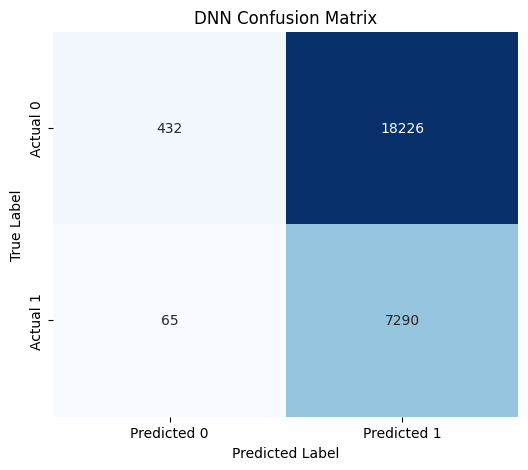


DNN Accuracy: 0.2969

DNN Area Under Curve (AUC): 0.5084


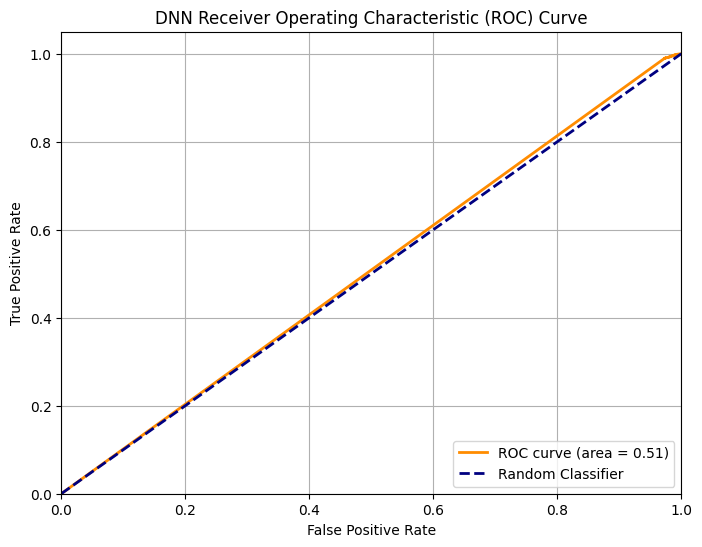

In [30]:
import torch
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set model to evaluation mode
model.eval()

all_labels = []
all_preds = []
all_probas = []

with torch.no_grad(): # Disable gradient calculation for evaluation
    for inputs, labels in test_loader:
        outputs = model(inputs)

        # For BCE Loss, model directly outputs probabilities after sigmoid
        probas = outputs  # outputs are already sigmoid-activated probabilities
        predicted_labels = (probas >= 0.5).float()

        all_labels.append(labels.cpu().numpy())
        all_preds.append(predicted_labels.cpu().numpy())
        all_probas.append(probas.cpu().numpy())

# Concatenate all predictions and labels
all_labels = np.concatenate(all_labels).flatten()
all_preds = np.concatenate(all_preds).flatten()
all_probas = np.concatenate(all_probas).flatten()

# 1. Confusion Matrix
conf_matrix_dnn = confusion_matrix(all_labels, all_preds)
print("DNN Confusion Matrix:")
print(conf_matrix_dnn)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_dnn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('DNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 2. Accuracy Score
accuracy_dnn = accuracy_score(all_labels, all_preds)
print(f"\nDNN Accuracy: {accuracy_dnn:.4f}")

# 3. ROC curve and 4. Area Under Curve (AUC)
fpr_dnn, tpr_dnn, thresholds_dnn = roc_curve(all_labels, all_probas)
roc_auc_dnn = auc(fpr_dnn, tpr_dnn)

print(f"\nDNN Area Under Curve (AUC): {roc_auc_dnn:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dnn, tpr_dnn, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_dnn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DNN Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

It seems like making the activation functions all ReLU made the DNN signifcantly worse. It did train slightly faster but still not a great outcome. Addtionally It seems like the descion tree was signifficatly better and quicker at making the binary classifactions.